<a href="https://www.kaggle.com/code/nikhilchadha1537/kidney-stone-classification-by-nikhil?scriptVersionId=160178123" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e12/sample_submission.csv
/kaggle/input/playground-series-s3e12/train.csv
/kaggle/input/playground-series-s3e12/test.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,roc_auc_score

In [3]:
train_data_file = pd.read_csv("../input/playground-series-s3e12/train.csv")
test_data_file = pd.read_csv("../input/playground-series-s3e12/test.csv")

# Analysis

In [4]:
train_data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [5]:
train_data_file.describe()

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [6]:
train_data_file.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [7]:
train_data_file.columns

Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

# Plotting the graphs

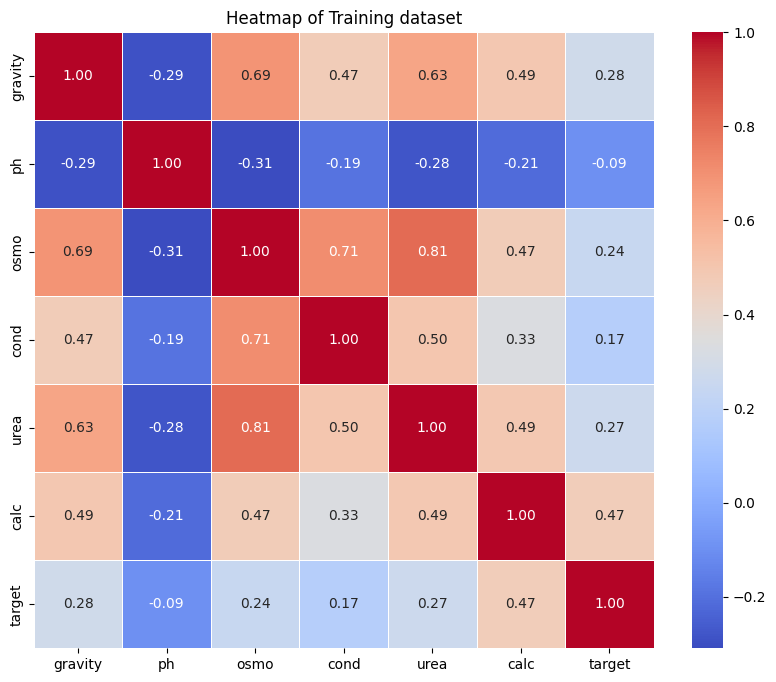

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
train_data = train_data_file.drop(columns=['id'])
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Training dataset')
plt.show()

In [9]:
train_data_file.isna().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [10]:
test_data = test_data_file.drop(columns=['id'])

# Modelling

**model1 = RandomForestClassifier**

**model2 = GradientBoostingClassifier**

**model3 = SVC**

In [11]:
X=train_data_file.drop(columns=['id', 'target'])
y=train_data_file['target']
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42
)

In [12]:
model1 = RandomForestClassifier()
model2 = GradientBoostingClassifier()
model3 = SVC(probability=True)

In [13]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

SVC(probability=True)

# Predictions

In [14]:
val_predictions1 = model1.predict_proba(X_val)[:, 1]
val_predictions2 = model2.predict_proba(X_val)[:, 1]
val_predictions3 = model3.predict_proba(X_val)[:, 1]

In [15]:
combined_predictions = (val_predictions1 + val_predictions2 + val_predictions3) / 3

auc_roc = roc_auc_score(y_val, combined_predictions)
print(f'AUC-ROC Score: {auc_roc}')

AUC-ROC Score: 0.8538011695906433


# Make predictions on the test data

In [16]:

test_predictions1 = model1.predict_proba(test_data)[:, 1]
test_predictions2 = model2.predict_proba(test_data)[:, 1]
test_predictions3 = model3.predict_proba(test_data)[:, 1]

combined_test_predictions = (test_predictions1 + test_predictions2 + test_predictions3) / 3

In [17]:
submission_df = pd.DataFrame({
    'id': test_data_file['id'],
    'target': combined_test_predictions
})
submission_df

,id,target
0,414,0.240615
1,415,0.604300
2,416,0.732994
3,417,0.465312
4,418,0.413448
...,...,...
271,685,0.800111
272,686,0.176826
273,687,0.731225
274,688,0.205250


In [18]:
submission_df.to_csv('submission.csv', index=False)